## Top 10 Countries by Crime and Safety Indexes, 2022

##### By Romina Goodarzi

### Import Packages and Data

In [1]:
### packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### importing the data as crime
crime = pd.read_csv('/kaggle/input/world-crime-index/World Crime Index .csv')
### taking an initial look at the data (and making sure it uploaded properly)
crime.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


The dataframe looks good. However, if we plan to take aggregations by the Country, we'll need to split City into City and Country.

### Clean Data and Create an Country-Based Dataframe

In [3]:
### seperate City and Country for later Country aggregations
Country = crime['City']
Country = Country.str.split(',', expand = True)
### taking a look at the splits of City
Country.head()


,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


Wait, why are there three columns? And why is the third appearing empty when .head() is called?

In [4]:
Country[2].value_counts()

 United States    58
 Canada            3
Name: 2, dtype: int64

Of course it's the US and Canada that have to make things difficult; their City column consists of "City, State / Province, Country." This means that we need to do a little bit more work to seperate it all, using fillna to make sure that Country[2] contains all of the Country names.

In [5]:
### fill all of the 'none' values in Country[2] with their values from Country[1]
Country[2] = Country[2].fillna(Country[1])
Country.head()

,0,1,2
0,Caracas,Venezuela,Venezuela
1,Pretoria,South Africa,South Africa
2,Celaya,Mexico,Mexico
3,San Pedro Sula,Honduras,Honduras
4,Port Moresby,Papua New Guinea,Papua New Guinea


Now, to minimize and reorganize columns...

In [6]:
### ensure "City" only contains the city, and make "Country" to contain the country
crime['City'] = Country[0]
crime['Country'] = Country[2]
### reorganize them in a better way
crime = crime[['Rank', 'City', 'Country', 'Crime Index', 'Safety Index']]
### ensure it looks right
crime.head()

,Rank,City,Country,Crime Index,Safety Index
0,1,Caracas,Venezuela,83.98,16.02
1,2,Pretoria,South Africa,81.98,18.02
2,3,Celaya,Mexico,81.80,18.20
3,4,San Pedro Sula,Honduras,80.87,19.13
4,5,Port Moresby,Papua New Guinea,80.71,19.29


Now our data is workable. For simplicity sake, we're going to make a new dataframe in which all records of a country are merged, giving us the average crime and safety index for that country. We'll call this new dataframe "countryindex".

In [7]:
### select the country (and use it as the index), crime index, and safety index
countryindex = crime[['Country','Crime Index','Safety Index']]
countryindex = countryindex.groupby('Country').mean()
### show how many countries are in the set, and check .head() to ensure it looks right
print("Number of Countries: ", countryindex.shape[0])
countryindex.head()


Number of Countries:  118


,Crime Index,Safety Index
Country,,
Afghanistan,79.390000,20.610000
Albania,44.500000,55.500000
Algeria,53.880000,46.120000
Angola,67.450000,32.550000
Argentina,66.273333,33.726667


And with that, it's time to start visualizing the Crime and Safety index scores of the 118 countries in the data. It is worth noting that Crime Index (CI) and Safety Index are exact opposites; that is, CI = 1 - SI and SI = 1 - CI; it may be redundant to have both, but it allows us to make charts based on either crime or safety (depending if you feel optimistic or pessimistic, or if someone decides to put a spin on how it is presented). 

### Visualizations

First, we'll divide the data into 2 top 10 tables, one for countries with the highest Crime Index, and one for countries with the highest Safety Index.

In [17]:
### create a dataframe of the top 10 countries with the highest crime index 
top10crime = countryindex.sort_values(by = ['Crime Index'], ascending = False)
top10crime = top10crime.head(10)
### create a dataframe of the top 10 countries with the highest safety index
top10safe = countryindex.sort_values(by = ['Safety Index'], ascending = False)
top10safe = top10safe.head(10)

Now, let's visualize each...

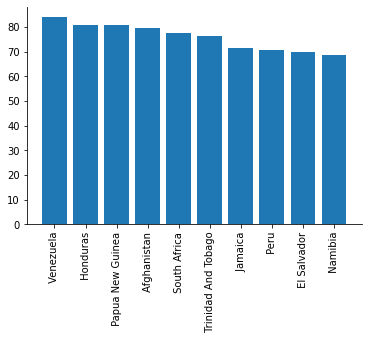

In [19]:
### top 10 highest crime index countries
plt.bar(top10crime.index, top10crime['Crime Index'])
### rotate x-axis names by 90 degrees
plt.xticks(rotation=90)
### remove the right axis and upper axis, for a cleaner look
sns.despine(top=True, right=True, left=False, bottom=False)
### show the plot
plt.show()

6 of the top 10 countries with the highest crime rates are in the Americas (Central America, South America, or the Caribbean), two of the countries are in Africa, one in the Middle East, and one in Maritime Southeast Asia. 

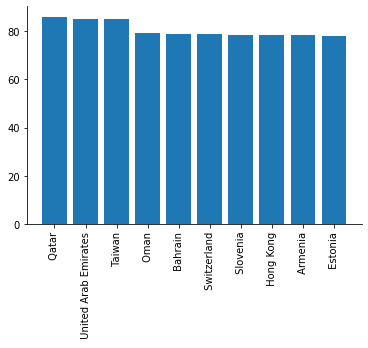

In [20]:
### top 10 highest safety index countries
plt.bar(top10safe.index, top10safe['Safety Index'])
### rotate country names by 90 degrees on the bottom axis
plt.xticks(rotation=90)
### remove the right and upper axis lines to clean the plot up
sns.despine(top=True, right=True, left=False, bottom=False)
### show the plot
plt.show()

4 of the 10 safest countries are in the Middle East, 4 are in Europe / Eurasia, and two are in East Asia.

#### Conclusion

I am skeptical with the list because of possible extremes, in the sense that some of the safest or unsafest countries may only have one data point. With only one observation, there may be much more that is not being captured by the summary, or the sample of data per country is too small to offer a really good overview.

I hope you enjoyed this quick EDA, and that the code to extract the countries is helpful. Please feel free to reach out with any questions, comments, or feedback!